# Knn Model

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import text
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('./prepared_data.csv')

In [42]:
df['subreddit'].value_counts(normalize=True)

0    0.507132
1    0.492868
Name: subreddit, dtype: float64

In [43]:
df.head()

,num_comments,num_upvotes,subreddit,comment_length,question_length,AUX_comment,NUM_comment,ADV_comment,SCONJ_comment,VERB_comment,...,way,word,work,world,year,Topic0,Topic1,Topic2,Topic3,Topic4
0,3,3,1,184,1970,0.055556,0.055556,0.083333,0.000000,0.111111,...,0.0,0.0,0.0,0.0,0.054868,0.054120,0.055009,0.055853,0.055294,0.779723
1,14,3,0,543,160,0.052632,0.026316,0.078947,0.017544,0.114035,...,0.0,0.0,0.0,0.0,0.000000,0.045641,0.631200,0.046250,0.045573,0.231336
2,55,3,0,83,343,0.047619,0.000000,0.142857,0.000000,0.095238,...,0.0,0.0,0.0,0.0,0.000000,0.060913,0.062961,0.638645,0.063170,0.174312
3,3,0,1,921,185,0.037037,0.010582,0.084656,0.015873,0.121693,...,0.0,0.0,0.0,0.0,0.000000,0.047397,0.048781,0.802321,0.053088,0.048413
4,29,1,0,74,115,0.125000,0.000000,0.125000,0.000000,0.312500,...,0.0,0.0,0.0,0.0,0.000000,0.083787,0.663595,0.084254,0.084290,0.084074


In [44]:
for column in df.columns:
    print(column)

num_comments
num_upvotes
subreddit
comment_length
question_length
AUX_comment
NUM_comment
ADV_comment
SCONJ_comment
VERB_comment
ADJ_comment
SPACE_comment
PART_comment
X_comment
PROPN_comment
DET_comment
PUNCT_comment
CCONJ_comment
PRON_comment
SYM_comment
INTJ_comment
NOUN_comment
ADP_comment
comment_polarity
comment_subjectivity
…
,
:
;
.
!
?
emojis
actually
amendment
area
bad
best
better
big
called
car
child
city
come
common
culture
did
different
edit
especially
example
experience
family
far
feel
food
friend
going
good
got
government
great
guy
having
heard
high
history
home
house
job
just
kid
kind
know
language
law
le
life
like
live
living
local
long
look
lot
love
make
maybe
mean
need
new
non
old
parent
party
people
person
place
popular
president
pretty
probably
public
quite
really
right
said
say
school
seen
similar
small
sound
state
term
thing
think
thought
time
town
understand
use
used
usually
want
way
word
work
world
year
Topic0
Topic1
Topic2
Topic3
Topic4


In [45]:
X = df.drop(columns = ['subreddit'])#, 'Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4'

y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [47]:
knn = KNeighborsClassifier()

grid = {
    'n_neighbors': [2, 3],
    'weights': ['uniform', 'distance']
}


gridsearch = GridSearchCV(knn, grid, verbose=1).fit(X_train, y_train)
print(gridsearch.best_score_)
gridsearch.best_params_


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5785827067669173


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished


{'n_neighbors': 3, 'weights': 'uniform'}

In [48]:
pd.DataFrame(gridsearch.cv_results_)[['mean_test_score', 'std_test_score']].sort_values('std_test_score')

,mean_test_score,std_test_score
0,0.575590,0.018426
2,0.578583,0.020933
3,0.578583,0.020933
1,0.562068,0.026815


In [49]:
print(f'Train Score:',gridsearch.score(X_train, y_train))

print(f'test Score:',gridsearch.score(X_test, y_test))

Train Score: 0.7782782782782782
test Score: 0.6171171171171171


(array([136.,   0.,   0.,   0.,   0., 411.,   0.,   0.,   0., 119.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

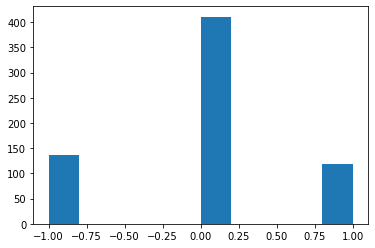

In [50]:
preds = gridsearch.predict(X_test)
residuals = y_test - preds
plt.hist(residuals)

**Interpretation**

The residual histogram shows us that the model is predicting more 'AskEurope' or 1 than 0: 'AskanAmerican.' 

From the extreme variance in the test and training scores, we can see that the model has high variance and the number of features would need to be decreased to get the model's overfitting down. 

In [51]:
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[190 136]
 [119 221]]


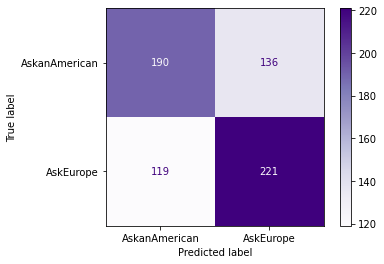

In [52]:
metrics.plot_confusion_matrix(gridsearch, X_test, y_test, cmap='Purples', 
                      values_format='d', display_labels=['AskanAmerican', 'AskEurope']);

In [53]:
# Precision: tp / (tp + fp)
print('Precision:', tp/(tp+fp))

# Recall: tp / (tp + fn)
print('Recall:', tp/(tp + fn))

# Accuracy: (tn + tp) / (tn + tp + fn + fp)
print('Accuracy:',(tn + tp) / (tn + tp + fn + fp))

# Specificity: tn / (tn + fp)

print('Specificity:',tn / (tn + fp))

Precision: 0.6190476190476191
Recall: 0.65
Accuracy: 0.6171171171171171
Specificity: 0.5828220858895705
